In [3]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt 
import numpy as np
import math



In [2]:
csv_files = glob.glob(os.path.join(os.getcwd() + r"\data\\fixed", "*csv"))
print(f"csv files: {csv_files}")

csv files: ['d:\\Dataset\\Parkster\\notebook\\data\\\\fixed\\events_a.csv', 'd:\\Dataset\\Parkster\\notebook\\data\\\\fixed\\events_b.csv', 'd:\\Dataset\\Parkster\\notebook\\data\\\\fixed\\events_before_test.csv', 'd:\\Dataset\\Parkster\\notebook\\data\\\\fixed\\extra_info_a.csv', 'd:\\Dataset\\Parkster\\notebook\\data\\\\fixed\\extra_info_b.csv', 'd:\\Dataset\\Parkster\\notebook\\data\\\\fixed\\extra_info_before_test.csv']


In [3]:
def merge_events(csv_files, index1, index2):
    # merge csv files
    df1 = pd.read_csv(csv_files[index1], index_col=0)
    df2 = pd.read_csv(csv_files[index2], index_col=0)
    
    df = pd.merge(df1, df2, on='user_id', how='left')
    return df
    

In [4]:
df_event_a = merge_events(csv_files, 0, 3)
df_event_b = merge_events(csv_files, 1, 4)
df_event_before = merge_events(csv_files, 2, 5)

In [5]:
# Order_value, which is our only numeric data.
# Clearly we can see that there is outliers, Min value in both Event B and Event Before is negative.
print(f"Event a {df_event_a.describe()}")
print("")
print(f"Event b {df_event_b.describe()}")
print("")
print(f"Event before {df_event_before.describe()}")

Event a        order_value
count    98.000000
mean    222.928571
std      81.525437
min      13.000000
25%     154.000000
50%     222.000000
75%     288.750000
max     392.000000

Event b        order_value
count   141.000000
mean    178.936170
std      96.106356
min     -25.000000
25%     112.000000
50%     184.000000
75%     233.000000
max     467.000000

Event before        order_value
count  1023.000000
mean    219.267840
std      82.108578
min     -27.000000
25%     160.000000
50%     217.000000
75%     270.500000
max     544.000000


### Counting values on each column to see where we have null-values

In [6]:
df_event_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       1098 non-null   object 
 1   account_type  1098 non-null   object 
 2   date          1098 non-null   object 
 3   event_type    1098 non-null   object 
 4   order_value   98 non-null     float64
 5   country       895 non-null    object 
 6   gender        897 non-null    object 
dtypes: float64(1), object(6)
memory usage: 68.6+ KB


In [7]:
df_event_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 0 to 1140
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       1141 non-null   object 
 1   account_type  1141 non-null   object 
 2   date          1141 non-null   object 
 3   event_type    1141 non-null   object 
 4   order_value   141 non-null    float64
 5   country       906 non-null    object 
 6   gender        919 non-null    object 
dtypes: float64(1), object(6)
memory usage: 71.3+ KB


In [8]:
df_event_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11023 entries, 0 to 11022
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       11023 non-null  object 
 1   account_type  11023 non-null  object 
 2   date          11023 non-null  object 
 3   event_type    11023 non-null  object 
 4   order_value   1023 non-null   float64
 5   country       8964 non-null   object 
 6   gender        8889 non-null   object 
dtypes: float64(1), object(6)
memory usage: 688.9+ KB


In all three cases we see around 20 % missing values in country and gender.

# EDA

Time to see where we have outliers

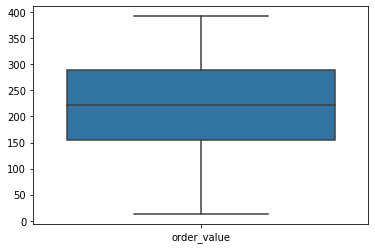

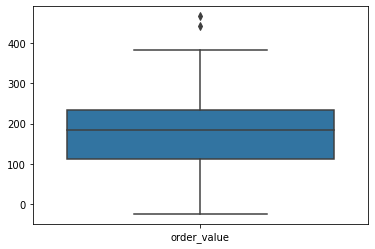

<AxesSubplot: >

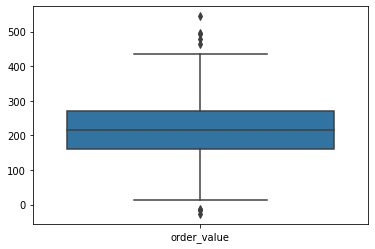

In [9]:
sns.boxplot(df_event_a)
plt.show()
sns.boxplot(df_event_b)
plt.show()
sns.boxplot(df_event_before)

We can clearly see outliers both high and low values. But values below zero must be an error so only these i will remove.

In [10]:
def remove_below_zero_outliers(df, df_name):
    # function to remove values below or equal to zero
    print(f"Outliers removed from {df_name}: {df.order_value[df.order_value <= 0].count()}")
    df_filtered = df.loc[(df['event_type'] != 'purchased_shopping_cart') | (df['order_value'] > 0)]

    df_filtered = df_filtered.drop(df_filtered.loc[(df_filtered['event_type'] == 'purchased_shopping_cart') & (df_filtered['order_value'] < 0)].index)
    
    return df_filtered

In [11]:
df_event_a = remove_below_zero_outliers(df_event_a, "df_event_a")
df_event_b = remove_below_zero_outliers(df_event_b, "df_event_b")
df_event_before = remove_below_zero_outliers(df_event_before, "df_event_before")

Outliers removed from df_event_a: 0
Outliers removed from df_event_b: 3
Outliers removed from df_event_before: 4


## Time frame

In [12]:
# Change type of data from object to datetime
df_event_a.date = pd.to_datetime(df_event_a.date)
df_event_b.date = pd.to_datetime(df_event_b.date)
df_event_before.date = pd.to_datetime(df_event_before.date)

In [13]:
df_event_a['weekday'] = df_event_a.date.dt.day_name()
df_event_b['weekday'] = df_event_b.date.dt.day_name()
df_event_before['weekday'] = df_event_before.date.dt.day_name()

In [14]:
print(f"Event before: {df_event_before.date.min()} - {df_event_before.date.max()}")
print(f"Event A before: {df_event_a.date.min()} - {df_event_a.date.max()}")
print(f"Event B before: {df_event_b.date.min()} - {df_event_b.date.max()}")

Event before: 2023-01-01 00:00:00 - 2023-01-31 00:00:00
Event A before: 2023-02-01 00:00:00 - 2023-02-07 00:00:00
Event B before: 2023-02-01 00:00:00 - 2023-02-07 00:00:00


Event A and Event B rund som 1st of February to 7th of February. Event Before is the whole of January

# Conversion

In [15]:
conv_event_a = [df_event_a.event_type[df_event_a.event_type == "opened_shopping_cart"].count(),
    df_event_a.event_type[df_event_a.event_type == "purchased_shopping_cart"].count()]
conv_event_b = [df_event_b.event_type[df_event_b.event_type == "opened_shopping_cart"].count(),
    df_event_b.event_type[df_event_b.event_type == "purchased_shopping_cart"].count()]

conv_event_before = [df_event_before.event_type[df_event_before.event_type == "opened_shopping_cart"].count(),
    df_event_before.event_type[df_event_before.event_type == "purchased_shopping_cart"].count()]

print(f"Event A: {conv_event_a} {(conv_event_a[1]/conv_event_a[0])*100} %")
print(f"Event B: {conv_event_b} {(conv_event_b[1]/conv_event_b[0])*100} %")
print(f"Event Before: {conv_event_before} {round((conv_event_before[1]/conv_event_before[0])*100,1)} %")

Event A: [1000, 98] 9.8 %
Event B: [1000, 138] 13.8 %
Event Before: [10000, 1019] 10.2 %


In [16]:
print(f"Difference betweem Event B and Event A: {round((conv_event_b[1]-conv_event_a[1]) / conv_event_a[1],2)*100} %")
print(f"Difference betweem Event B and Event Before: {round((((conv_event_b[1]/conv_event_b[0]))-((conv_event_before[1]/conv_event_before[0])))/((conv_event_before[1]/conv_event_before[0]))*100,1)} %")

Difference betweem Event B and Event A: 41.0 %
Difference betweem Event B and Event Before: 35.4 %


## Sample size

In [55]:
# N = population size - number of conversion in Event Before
N = conv_event_before[0]
# z = z-score
z = 1.96
# e = margin of error
e = 0.05
# p = standard deviation
p = 0.5

# numerator or Unlimited population
numerator = ((z**2) * p * (1 - p)) / (e**2)

denominator = 1 + (((z**2) * p * (1 - p)) / (e**2 * N))

sample_size = math.ceil(numerator / denominator)

print(f"Sample size with unlimited population {round(numerator)}")
print(f"Sample size with finite population: {sample_size}")

Sample size with unlimited population 384
Sample size with finite population: 370


In [ ]:
https://www.calculator.net/sample-size-calculator.html

In [18]:
print(f"Number of conversions for Event a: {conv_event_a[1]}")
print(f"Number of conversions for Event b: {conv_event_b[1]}")


Number of conversions for Event a: 98
Number of conversions for Event b: 138


The number of samples are to low to make a statistically correct judgment on the data.

# Gender split

In [19]:
#Event A:
event_a_gender_opened = df_event_a.gender[df_event_a.event_type=="opened_shopping_cart"].value_counts(normalize=True)*100
event_a_gender_purch = df_event_a.gender[df_event_a.event_type=="purchased_shopping_cart"].value_counts(normalize=True)*100
#Event B:
event_b_gender_opened = df_event_b.gender[df_event_b.event_type=="opened_shopping_cart"].value_counts(normalize=True)*100
event_b_gender_purch = df_event_b.gender[df_event_b.event_type=="purchased_shopping_cart"].value_counts(normalize=True)*100
#Event Before:
event_be_gender_opened = df_event_before.gender[df_event_before.event_type=="opened_shopping_cart"].value_counts(normalize=True)*100
event_be_gender_purch = df_event_before.gender[df_event_before.event_type=="purchased_shopping_cart"].value_counts(normalize=True)*100


In [20]:
gender_data = pd.DataFrame({
    'Event_A_Opened': [round(event_a_gender_opened[0],1), round(event_a_gender_opened[1],1), round(event_a_gender_opened[2],1)],
    'Event_B_Opened': [round(event_b_gender_opened[0],1), round(event_b_gender_opened[1],1), round(event_b_gender_opened[2],1)],
    'Event_Before_Opened' : [round(event_be_gender_opened[0],1), round(event_be_gender_opened[1],1), round(event_be_gender_opened[2],1)], 
    'Event_A_Purchase': [round(event_a_gender_purch[0],1), round(event_a_gender_purch[1],1), round(event_a_gender_purch[2],1)],
    'Event_B_Purchase': [round(event_b_gender_purch[0],1), round(event_b_gender_purch[1],1), round(event_b_gender_purch[2],1)],
    'Event_Before_Purchase' : [round(event_be_gender_purch[0],1), round(event_be_gender_purch[1],1), round(event_be_gender_purch[2],1)] 
}, index=['man', 'woman', 'non-binary'])
gender_data

,Event_A_Opened,Event_B_Opened,Event_Before_Opened,Event_A_Purchase,Event_B_Purchase,Event_Before_Purchase
man,44.7,44.6,44.1,46.9,42.9,44.3
woman,38.7,40.1,40.6,37.0,39.3,40.7
non-binary,16.5,15.3,15.4,16.0,17.9,15.0


## Country split

In [21]:
#Event A:
event_a_country_opened = df_event_a.country[df_event_a.event_type=="opened_shopping_cart"].value_counts(normalize=True)*100
event_a_country_purch = df_event_a.country[df_event_a.event_type=="purchased_shopping_cart"].value_counts(normalize=True)*100
#Event B:
event_b_country_opened = df_event_b.country[df_event_b.event_type=="opened_shopping_cart"].value_counts(normalize=True)*100
event_b_country_purch = df_event_b.country[df_event_b.event_type=="purchased_shopping_cart"].value_counts(normalize=True)*100
#Event Before:
event_be_country_opened = df_event_before.country[df_event_before.event_type=="opened_shopping_cart"].value_counts(normalize=True)*100
event_be_country_purch = df_event_before.country[df_event_before.event_type=="purchased_shopping_cart"].value_counts(normalize=True)*100


In [22]:

df_country = pd.concat([round(event_a_country_purch,1), round(event_b_country_purch,1), round(event_be_country_purch,1)], axis=1, keys= ['Event a', 'Event b', 'Event before'])

In [23]:
df_country

,Event a,Event b,Event before
sweden,57.8,62.0,64.1
denmark,18.1,18.0,14.0
norway,14.5,14.0,9.5
germany,9.6,6.0,12.4


## Weekday split

In [24]:
def plot_weekday_percentage(df, title):
    # order of days
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
    
    # create a new dataframe with the counts of opened_shopping_cart events by weekday
    df_opened_counts = df[df['event_type'] == 'opened_shopping_cart'].groupby('weekday').size()

    # create a new dataframe with the counts of purchased_shopping_cart events by weekday
    df_purchased_counts = df[df['event_type'] == 'purchased_shopping_cart'].groupby('weekday').size()

    # calculate the percentage of opened_shopping_cart events on total opened_shopping_cart by weekday
    df_opened_pct = df_opened_counts / df_opened_counts.sum()

    # calculate the percentage of purchased_shopping_cart events on total purchased_shopping_cart by weekday
    df_purchased_pct = df_purchased_counts / df_purchased_counts.sum()

    # concatenate the two percentage dataframes
    df_concat = pd.concat([df_opened_pct, df_purchased_pct], axis=1)
    df_concat = df_concat.reindex(weekday_order)

    # create the bar plot with a size of 10 inches by 6 inches
    fig, ax = plt.subplots(figsize=(10, 6))
    df_concat.plot(kind='bar', ax=ax)

    # set the title and axis labels
    ax.set_title(title)
    ax.set_xlabel('Weekday')
    ax.set_ylabel('Percentage')

    # add a legend
    ax.legend(['opened_shopping_cart', 'purchased_shopping_cart'])

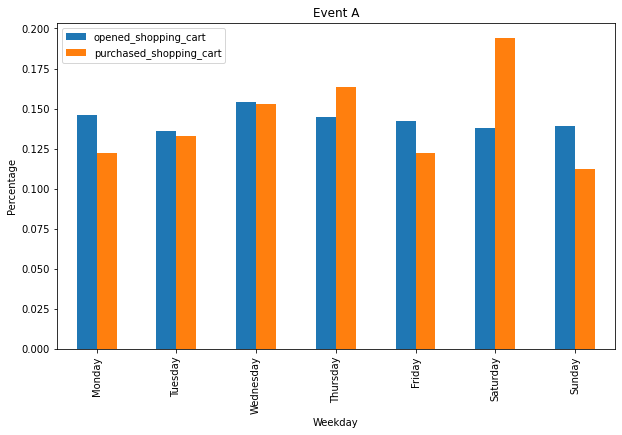

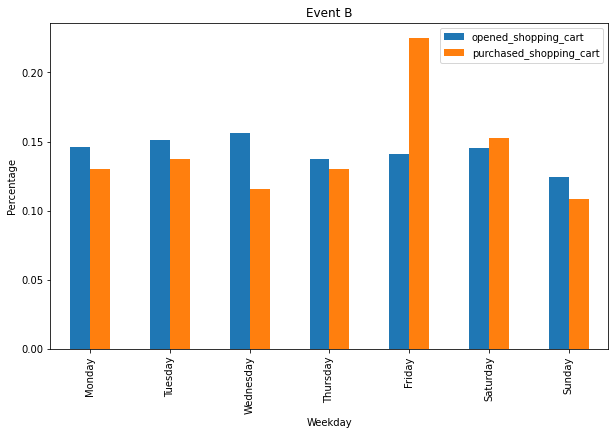

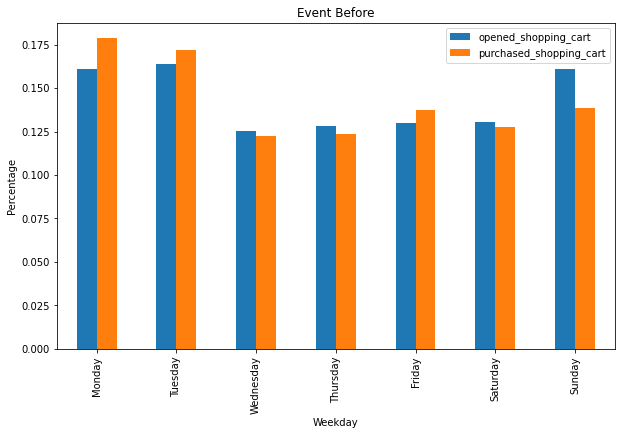

In [25]:
plot_weekday_percentage(df_event_a, title="Event A")
plot_weekday_percentage(df_event_b, title="Event B")
plot_weekday_percentage(df_event_before, title="Event Before")

## Sales

In [26]:
weekday_average = df_event_before.groupby('weekday')['order_value'].mean()
weekday_average

weekday
Friday       248.114286
Monday       218.109890
Saturday     238.107692
Sunday       231.269504
Thursday     206.658730
Tuesday      209.371429
Wednesday    189.656000
Name: order_value, dtype: float64

In [27]:
sales_a = df_event_a.groupby('weekday')['order_value'].mean()
sales_b = df_event_b.groupby('weekday')['order_value'].mean()
sales_before = df_event_before.groupby('weekday')['order_value'].mean()


In [28]:
# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the three series using the weekday_order list
sales_a = sales_a.reindex(weekday_order)
sales_b = sales_b.reindex(weekday_order)
sales_before = sales_before.reindex(weekday_order)

# Round the three series to 2 decimal places
sales_a = sales_a.round(2)
sales_b = sales_b.round(2)
sales_before = sales_before.round(2)


In [29]:
# Combine the three series into one DataFrame
comb_df = pd.DataFrame({'sales_a': sales_a, 'sales_b': sales_b, 'sales_before': sales_before})
comb_df['mean_per_row'] = comb_df.mean(axis=1)
comb_df.mean_per_row = comb_df.mean_per_row.round(2)
# Print the resulting DataFrame
print(comb_df)

           sales_a  sales_b  sales_before  mean_per_row
weekday                                                
Monday      237.83   174.22        218.11        210.05
Tuesday     200.46   165.95        209.37        191.93
Wednesday   202.73   156.88        189.66        183.09
Thursday    206.81   206.17        206.66        206.55
Friday      223.67   188.77        248.11        220.18
Saturday    241.37   192.00        238.11        223.83
Sunday      251.55   192.27        231.27        225.03


### Plot Order Value figures

<AxesSubplot: xlabel='weekday'>

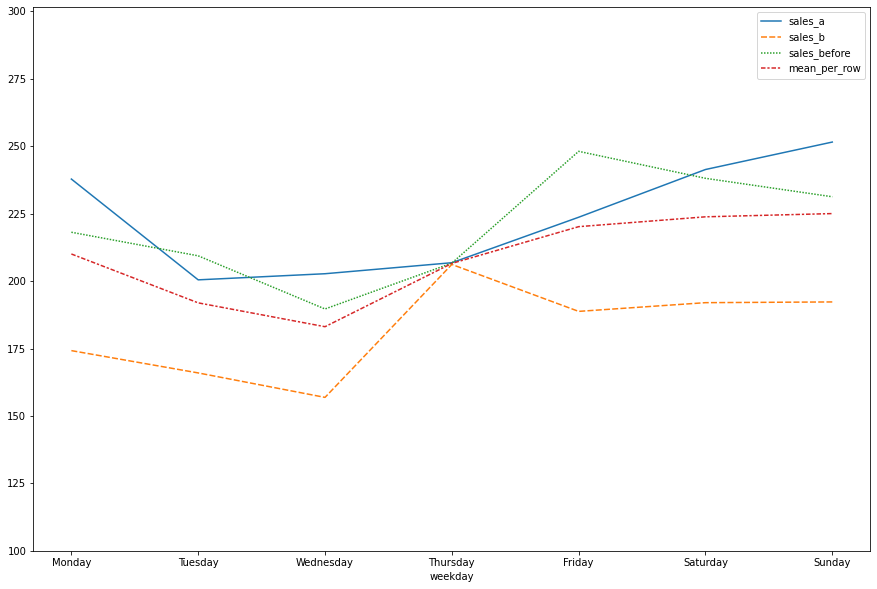

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.ylim((100, comb_df.sales_a.max()+50))
sns.lineplot(comb_df, ax=ax)

### Mean order value

In [31]:
print(round(df_event_a.order_value.mean(),1))
print(round(df_event_b.order_value.mean(),1))
print(round(df_event_before.order_value.mean(),1))

222.9
183.2
220.2


### Median order value

In [32]:
print(round(df_event_a.order_value.median(),1))
print(round(df_event_b.order_value.median(),1))
print(round(df_event_before.order_value.median(),1))

222.0
187.0
217.0


### Min and Max order value

In [33]:
print(f"{df_event_a.order_value.min()} {df_event_a.order_value.max()}")
print(f"{df_event_b.order_value.min()} {df_event_b.order_value.max()}")
print(f"{df_event_before.order_value.min()} {df_event_before.order_value.max()}")

13.0 392.0
8.0 467.0
14.0 544.0


# Looking at gender and purchases changes

In [34]:
def plot_weekday_gender_purchase(df, title):
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Filter the DataFrame to only include purchase_shopping_cart events
    df_purchase = df.loc[df['event_type'] == 'purchased_shopping_cart']

    # Calculate the count of male and female users for each weekday
    df_gender = df_purchase.groupby(['weekday', 'gender']).size().reset_index(name='count')

    # Calculate the percentage of each gender type for each weekday
    df_gender_pct = pd.DataFrame()
    for weekday in df_gender['weekday'].unique():
        df_gender_weekday = df_gender.loc[df_gender['weekday'] == weekday].copy()
        total_count = df_gender_weekday['count'].sum()
        df_gender_weekday['percentage'] = df_gender_weekday['count'] / total_count * 100
        df_gender_pct = pd.concat([df_gender_pct, df_gender_weekday])

    # Create the bar plot

    # Specify the order for the legend labels
    hue_order = ['man', 'woman', 'non-binary']
    
    # Specify the colors for the genders
    colors = {"man": "#339FFF", "woman": "#FF5733", "non-binary" : "#33FF80"}
    
    #Figsize
    fig, ax = plt.subplots(figsize=(10, 5))
    # Create the bar plot
    sns.barplot(data=df_gender_pct, x='weekday', y='percentage', hue='gender', hue_order=hue_order, order=weekday_order, palette=colors, ax=ax)
    sns.color_palette("pastel")
    # Set the title and labels for the plot
    ax.set_title(title)
    #sns.set(title=title, xlabel='Weekday', ylabel='Percentage of Purchases')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # Show the plot
    plt.show()

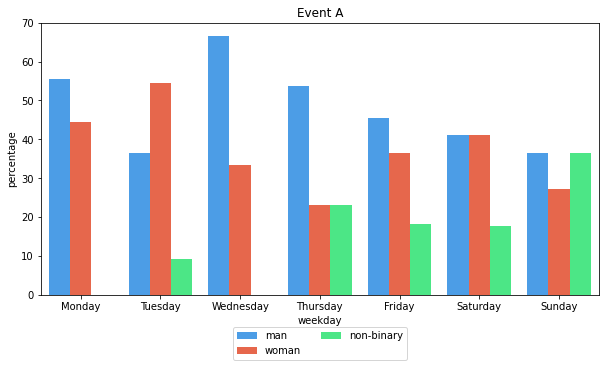

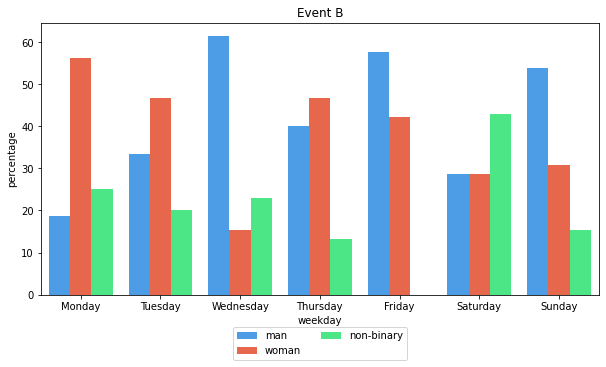

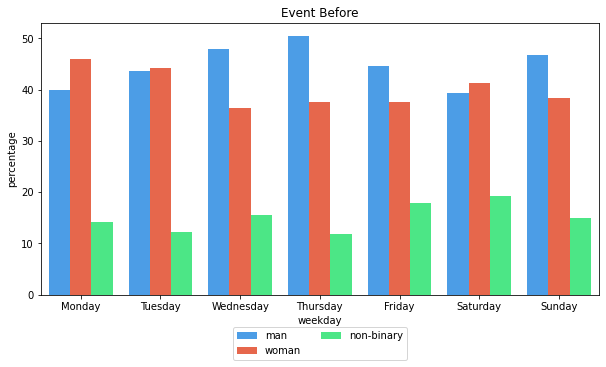

In [35]:
plot_weekday_gender_purchase(df_event_a, title="Event A")
plot_weekday_gender_purchase(df_event_b, title="Event B")
plot_weekday_gender_purchase(df_event_before, title="Event Before")

# Account type

### Event A

In [36]:
df_event_a.account_type.unique()

array(['free', 'basic', 'premium'], dtype=object)

In [37]:
account_event_a = df_event_a.groupby(['account_type','event_type']).count()
account_event_a.rename(columns={'user_id':'Event a'}, inplace=True)
#account_event_a.user_id

In [38]:
print(f"Basic {round(account_event_a['Event a'][1]/account_event_a['Event a'][0]*100,1)} %")
print(f"Free {round(account_event_a['Event a'][3]/account_event_a['Event a'][2]*100,1)} %")
print(f"Premium {round(account_event_a['Event a'][5]/account_event_a['Event a'][4]*100,1)} %")

Basic 10.5 %
Free 9.6 %
Premium 9.5 %


In [39]:
temp_event_a = round(account_event_a.iloc[1::2, :1] / account_event_a.iloc[1::2, :1].sum() *100,1)

### Event B

In [40]:
account_event_b = df_event_b.groupby(['account_type','event_type']).count()
account_event_b.rename(columns={'user_id':'Event b'}, inplace=True)


In [41]:
print(f"Basic {round(account_event_b['Event b'][1]/account_event_b['Event b'][0]*100,1)} %")
print(f"Free {round(account_event_b['Event b'][3]/account_event_b['Event b'][2]*100,1)} %")
print(f"Premium {round(account_event_b['Event b'][5]/account_event_b['Event b'][4]*100,1)} %")

Basic 14.8 %
Free 13.4 %
Premium 14.6 %


In [42]:
temp_event_b = round(account_event_b.iloc[1::2, :1] / account_event_b.iloc[1::2, :1].sum() *100,1)

### Event Before

In [43]:
account_event_before = df_event_before.groupby(['account_type','event_type']).count()
account_event_before.rename(columns={'user_id':'Event before'}, inplace=True)
#account_event_before.user_id

In [44]:
print(f"Basic {round(account_event_before['Event before'][1]/account_event_before['Event before'][0]*100,1)} %")
print(f"Free {round(account_event_before['Event before'][3]/account_event_before['Event before'][2]*100,1)} %")
print(f"Premium {round(account_event_before['Event before'][5]/account_event_before['Event before'][4]*100,1)} %")

Basic 10.4 %
Free 10.3 %
Premium 8.8 %


In [45]:
temp_event_before = round(account_event_before.iloc[1::2, :1] / account_event_before.iloc[1::2, :1].sum() *100,1)

In [46]:
df = pd.concat([temp_event_a, temp_event_b, temp_event_before], axis=1)

In [47]:
df

,,Event a,Event b,Event before
account_type,event_type,,,
basic,purchased_shopping_cart,22.4,23.9,21.0
free,purchased_shopping_cart,67.3,65.9,70.4
premium,purchased_shopping_cart,10.2,10.1,8.6
